# Import Things

In [36]:
import numpy as np
from random import randint
import os
import json
import settings
import pickle
import nltk.data
from pyvi import ViTokenizer

## Read file

In [37]:
class FileReader(object):
    def __init__(self, filePath, encoder = None):
        self.filePath = filePath
        self.encoder = encoder if encoder != None else 'utf-8'
    
    def read(self):
        with open(self.filePath, 'r') as f:
            s = f.read()
        return s
    
    def content(self):
        s = self.read()
        return s.decode(self.encoder)
    
    def read_json(self):
        s = ''
        with open(self.filePath, 'r', encoding=self.encoder) as f:
            s = json.load(f)
        return s

    def read_stopwords(self):
        with open(self.filePath, 'r') as f:
            stopwords = set([w.strip().replace(' ', '_') for w in f.readlines()])
        return stopwords

    def load_dictionary(self):
        return corpora.Dictionary.load_from_text(self.filePath)



## File Store

In [38]:
class FileStore(object):
    def __init__(self, filePath, data = None):
        self.filePath = filePath
        self.data = data

    def store_json(self):
        with open(self.filePath, 'w') as outfile:
            json.dump(self.data, outfile)

    def store_dictionary(self, dict_words):
        dictionary = corpora.Dictionary(dict_words)
        dictionary.filter_extremes(no_below=20, no_above=0.3)
        dictionary.save_as_text(self.filePath)
    
    def save_pickle(self, obj):
        outfile = open(self.filePath, 'wb')
        fastPickler = pickle.Pickler(outfile, pickle.HIGHEST_PROTOCOL)
        fastPickler.fast = 1
        fastPickler.dump(obj)
        outfile.close()

## Data loader

In [39]:
# class DataLoader(object):
#     def __init__(self, dataPath):
#         self.dataPath = dataPath
#     def __get_file(self):
#         files = {}
#         titles = os.listdir(settings.DATA_RAW)
#         # for title in titles:
#         #     files[title] = [folder +]
#         return titles
#     # def get_json(self):

# dl = DataLoader(settings.DATA_RAW)
titles = os.listdir(settings.DATA_RAW)
print(titles)

['van-hoa.json', 'tam-long-nhan-ai.json', 'the-thao.json', 'kinh-doanh.json', 'the-gioi.json', 'suc-khoe.json', 'su-kien.json', 'dantri.json', 'xa-hoi.json', 'giao-duc-huong-nghiep.json', 'lao-dong-viec-lam.json']


## NLP


In [40]:
from pyvi import ViTokenizer, ViPosTagger
import numpy as np
import string
import re


class NLP(object):
    def __init__(self, text=None):
        self.text = text
        self.stopwords = FileReader(settings.STOP_WORDS).read_stopwords()
        print(str(len(self.stopwords)))
        self.newWords = []
        
    def remove_tags(self, raw_html):
        cleanr = re.compile('<.*?>')
        cleantext = re.sub(cleanr, '', raw_html )
        return cleantext

    def remove_links(self, text):
        text = re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
        return text

    def remove_punctuation(self, text):
        return text.translate(str.maketrans('', '', string.punctuation))
        

    def remove_stopwords(self, words, stopwords):
        important_words = []
        for index in range(len(words)):
            if (words[index] not in stopwords ):
                important_words.append(words[index])
        self.tokens = important_words
        return important_words
    
    def lower_sentences(self, text):
         return text.lower()

    def tokenize_sentences(self, text):
        return ViTokenizer.tokenize(text)

    def segment_word(self, tokens):
        return ViPosTagger.postagging(tokens)
    
    def keep_verb_noun(self, postags):
        res = []
        for index in range(len(postags[0])):
            if postags[1][index] == 'N' or postags[1][index] == 'V':
                res.append(postags[0][index])
        return res

    def remove_digits(self, tokens):
        new_words = []
        for index in range(len(tokens)):
            if not tokens[index].isdigit():
                new_words.append(tokens[index])
        return new_words
    
    def count_tokens(self, tokens):
        unique, counts = np.unique(tokens, return_counts=True)
        return dict(zip(unique, counts))
    
    def retrieve_tokens_times(self, tokens, n):
        tokens = {k: v for k, v in self.count_tokens(tokens).items() if int(v) >= n}
        return tokens 
        
    def preprocessText(self, text):
        processed_text = text
        processed_text = self.remove_tags(processed_text)
        processed_text = self.lower_sentences(processed_text)
        processed_text = self.remove_links(processed_text)
        processed_text = self.remove_punctuation(processed_text)
        tokens = self.segment_word(self.tokenize_sentences(processed_text))
        # print(tokens)
        # tokens = self.keep_verb_noun(tokens)
        important_tokens = self.remove_stopwords(tokens, self.stopwords)
        important_tokens = self.remove_digits(important_tokens)
        important_tokens = self.retrieve_tokens_times(important_tokens, 4)
        self.tokens = important_tokens
        return self.tokens

    def __repr__(self):
        return self.text

In [41]:
categories = os.listdir(settings.DATA_RAW)
print(categories)

['van-hoa.json', 'tam-long-nhan-ai.json', 'the-thao.json', 'kinh-doanh.json', 'the-gioi.json', 'suc-khoe.json', 'su-kien.json', 'dantri.json', 'xa-hoi.json', 'giao-duc-huong-nghiep.json', 'lao-dong-viec-lam.json']


## Feature Extraction

In [42]:
class FeatureExtraction(object):
    def __init__(self, data):
        self.data = data
    
    def __build_dictionary(self):
        print("********************Build Dictionary*****************")
        __dict = []
        for idx, cate in enumerate(categories):
            print()

In [61]:
test = FileReader(settings.DATA_RAW + 'dantri.json').read_json()
data = []
categories = []
cate = set()
categories_data = []
for d in test:
    nlp = NLP(text=d['content'])
    tokens = nlp.preprocessText(d['content'])
    for key, value in tokens.items():
        data.append(key)
        categories_data.append(d['topic'])
        cate.add(d['topic'])
categories = list(cate)
        


1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942


In [62]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

train, test, y_train, y_test = train_test_split(data, categories_data, test_size=0.2, random_state=0)

In [63]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_train = tfidf_vectorizer.fit_transform(train)
tfidf_test = tfidf_vectorizer.transform(test)

In [64]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(tfidf_train, y_train)
y_pred = nb.predict(tfidf_test)
print('Accuracy test: ',accuracy_score(y_test, y_pred))
print('Accuracy train:',accuracy_score(y_train, nb.predict(tfidf_train)))

Accuracy test:  0.5693898889422669
Accuracy train: 0.6089343243090488


In [65]:
print(categories)

['the-gioi', 'xa-hoi', 'the-thao', 'suc-khoe', 'lao-dong-viec-lam', 'van-hoa', 'su-kien', 'giao-duc-huong-nghiep', 'kinh-doanh', 'tam-long-nhan-ai']


1
[[2394  167  158   11  186  905   73   84  131  238]
 [ 278 1855  227   10  116  722  120   32   89  203]
 [ 307  348 1067    9   84  698   36   51  125  199]
 [ 236  212   93   48  247  467  229  220   98  313]
 [ 195  100   71   13 1468  737   36   17   52  159]
 [ 254   86   86    6  145 7559   42   47  118  112]
 [ 130  149   28   30  159  225 1123   46   87   97]
 [  73   60   28   22   17  410   48 2118   44   23]
 [ 200  111   93    8   63  912   72   96 1485   93]
 [ 357  228  110   44  342  639   75   44   77 1032]]


<AxesSubplot:>

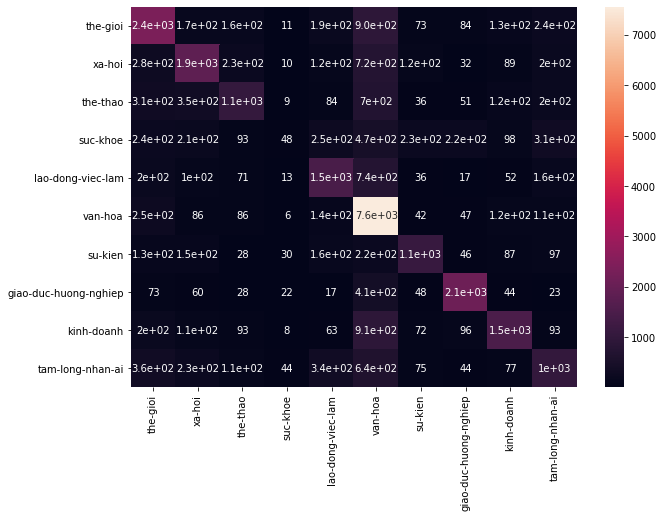

In [66]:
from sklearn.metrics import confusion_matrix
print(len(y_pred.shape)) 
cm=confusion_matrix(y_test, y_pred)
print(cm)

import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
df_cm = pd.DataFrame(cm, index = [cate for cate in categories],
                  columns = [cate for cate in categories])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

In [69]:
fileStore = FileStore(settings.DIR_PATH + "//"+ 'nb.pkl')
fileStore.save_pickle(nb)